# Variation on scrape-search-functions with visualisation in mind.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#import all data from the folder I've made (generated from TS.py)

import glob
data=[]
path = "D:/TradeMe2/*.csv"
for fname in glob.glob(path):
    data.append(pd.read_csv(fname))

## I want to only concern myself with buynowprices here as I'm only interested in market prices, rather than prices over time.

## Plan is to make a function with two terms (string1, string2) and graph them as a plot 


### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 1: Delete rows with bidonly

### 2: Make search functions (take from scrape_search_functions.ipynb)

### 3: Extract buynowprices from search+group into ranges

### 4: Graph 

In [3]:
Data=pd.concat(data) #Stack .csvs


Data=Data.ix[:,Data.columns!= 'Unnamed: 0'] #delete inbuild index (for uniquifying later)

Data = Data[Data.BuyNowPricee != 'BidOnly'] #delete any rows which dont have buynowprice

Data[['BuyNowPricee']] = Data[['BuyNowPricee']].replace('[\$,]','',regex=True).astype(float) #convert currency to integer.

Data.head(5)

,Location,Item_Name,BidPrice,ID,BuyNowPricee
0,Auckland,"ZTE F328 ""Top of Line Basic Compact Model)",$38.00,"1330538382""",38.0
2,Otago,Sony Xperia M2,$249.00,"1330538751""",270.0
4,Auckland,Samsung Galaxy S5---Like New Condition,BuyNowOnly,"1330548139""",279.0
6,Auckland,"Immaculate iPhone 6 plus Gold, 64gb",$850.00,"1330542627""",850.0
7,Wellington,iPhone 5/6/7 iPod Touch 5/6 iPad Charge/Sync C...,BuyNowOnly,"1329401580""",1.0


In [23]:
#Now just import the search function.

#part 1:
def search(item,data): # probably by index...
    df = data.loc[(data.ix[:,'ID'] == item)]
    df=df['BuyNowPricee'].tolist()

    return(sum(df)//len(df))
search('1329808163"',Data) #This returns average buynowprice for given item/


549.0

In [24]:
#part 2:

def name(item): 
    dfbasic = Data.loc[Data['Item_Name'].str.contains(item)]
    IDS=dfbasic['ID'].tolist()
    IDS2=np.unique(IDS)
    
    lister=[]
    
    for i in range(len(IDS2)):
        lister.append(search(IDS2[i], dfbasic))
    return(np.array(sorted(lister)))
#name('iPhone')

In [37]:
import seaborn as sns
import scipy
from scipy import stats, integrate
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "distributions")))

#many features of Seaborn missing. Related to statmodels: can't draw kernals.

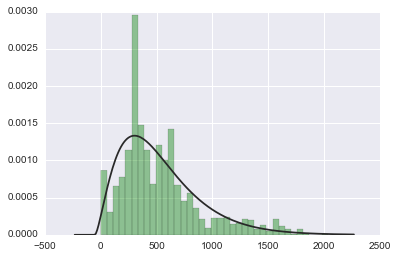

In [66]:
%matplotlib inline


def grapher(key):
    a=sns.distplot(name(key), kde=False, fit=stats.gamma, color='green', label=key)
    return(a)

grapher('iPhone')